In [346]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


Stay-At-Home Fund - JNJ - Company Specific Overview

In [347]:
jnj_prices = pd.read_csv('Stay At Home Fund/JNJ.csv')
jnj_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,2.24,2.45,2.20,2.44,0.98,141102400
1,1985-02-01,2.39,2.51,2.31,2.46,0.98,131019200
2,1985-03-01,2.44,2.63,2.42,2.62,1.06,149992000
3,1985-04-01,2.61,2.80,2.52,2.74,1.11,183592000
4,1985-05-01,2.73,2.96,2.68,2.94,1.18,136675200
...,...,...,...,...,...,...,...
466,2023-11-01,149.19,155.14,145.64,154.66,152.28,131078100
467,2023-12-01,156.44,160.02,151.77,156.74,155.56,146527600
468,2024-01-01,156.93,163.58,156.79,158.90,157.70,138190400
469,2024-02-01,158.16,162.25,154.84,161.38,160.16,158288200


In [348]:
sp500 = pd.read_csv('sp500_index.csv')
sp500

,Date,Price
0,2014-03-20,1872.01
1,2014-03-21,1866.52
2,2014-03-24,1857.44
3,2014-03-25,1865.62
4,2014-03-26,1852.56
...,...,...
2512,2024-03-13,5165.31
2513,2024-03-14,5150.48
2514,2024-03-15,5117.09
2515,2024-03-18,5149.42


In [349]:
jnj_prices['Date'] = pd.to_datetime(jnj_prices['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])

jnj_prices.set_index('Date', inplace=True)
sp500.set_index('Date', inplace= True)
sp500 = sp500.resample('MS').first()

In [350]:
jnj_prices = jnj_prices[jnj_prices.index > '2014-03-01']

In [351]:
jnj_quantity = 50000/jnj_prices.loc['2014-04-1','Close']
sp500_quantity = 50000/sp500.loc['2014-04-01','Price']




In [352]:

jnj_portfolio_val = pd.DataFrame({'Date':jnj_prices.index,'Value':jnj_prices['Close']})
jnj_portfolio_val.set_index('Date',inplace=True)

In [353]:
jnj_portfolio_val['Value'] *= jnj_quantity
jnj_portfolio_val

,Value
Date,
2014-04-01,50000.00
2014-05-01,50083.92
2014-06-01,51643.80
2014-07-01,49407.64
2014-08-01,51204.46
...,...
2023-11-01,76345.15
2023-12-01,77371.90
2024-01-01,78438.14


In [354]:
sp500['Price'] *= sp500_quantity
sp500

,Price
Date,
2014-03-01,49641.74
2014-04-01,50000.00
2014-05-01,49951.21
2014-06-01,51046.13
2014-07-01,52328.27
...,...
2023-11-01,112379.08
2023-12-01,121839.86
2024-01-01,125769.81


In [355]:
sp500.rename(columns={'Price': 'Value'}, inplace=True)



In [356]:
# Assuming both sp500 and jnj_portfolio_val have a 'Date' index and we've already renamed our columns of interest to 'Value'
sp_jnj = pd.merge(sp500, jnj_portfolio_val, left_index=True, right_index=True, suffixes=('_sp500', '_jnj'))
sp_jnj

,Value_sp500,Value_jnj
Date,,
2014-04-01,50000.00,50000.00
2014-05-01,49951.21,50083.92
2014-06-01,51046.13,51643.80
2014-07-01,52328.27,49407.64
2014-08-01,51050.90,51204.46
...,...,...
2023-11-01,112379.08,76345.15
2023-12-01,121839.86,77371.90
2024-01-01,125769.81,78438.14


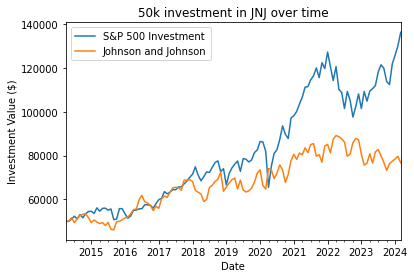

In [357]:
sp_jnj.plot()
plt.title('50k investment in JNJ over time')
plt.ylabel('Investment Value ($)')
plt.xlabel('Date')
plt.legend(['S&P 500 Investment', 'Johnson and Johnson'])
plt.show()

In [358]:
avgo_prices = pd.read_csv('Out In The World Fund/AVGO.csv')
avgo_prices['Date'] = pd.to_datetime(avgo_prices['Date'])
avgo_prices.set_index('Date', inplace=True)

In [359]:
numeric_cols = avgo_prices.select_dtypes(include=['float64', 'float32'])
avgo_prices[numeric_cols.columns] = numeric_cols.round(2)

In [360]:
avgo_prices = avgo_prices[avgo_prices.index>'2014-03-01']
avgo_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-01,64.55,65.58,57.27,63.50,48.29,49858600
2014-05-01,62.92,72.00,62.58,70.67,53.74,125561000
2014-06-01,71.21,72.50,70.06,72.07,54.81,35952400
2014-07-01,72.48,76.44,68.80,69.38,52.98,42355000
2014-08-01,69.92,84.80,68.71,82.09,62.69,35857500
...,...,...,...,...,...,...
2023-11-01,842.00,999.87,835.57,925.73,917.59,60593200
2023-12-01,922.46,1151.82,903.10,1116.25,1106.43,92528300
2024-01-01,1092.12,1284.55,1041.51,1180.00,1175.00,58280600


In [361]:
avgo_quantity = 50000/avgo_prices.loc['2014-04-01','Adj Close']
avgo_quantity

1035.4110581901016

In [362]:
avgo_val = pd.DataFrame({'Date':avgo_prices.index,'Value':avgo_prices['Adj Close']})
avgo_val.set_index('Date', inplace=True)
avgo_val['Value'] *= avgo_quantity

avgo_val

,Value
Date,
2014-04-01,50000.00
2014-05-01,55642.99
2014-06-01,56750.88
2014-07-01,54856.08
2014-08-01,64909.92
...,...
2023-11-01,950082.83
2023-12-01,1145609.86
2024-01-01,1216607.99


In [363]:
# Assuming both sp500 and jnj_portfolio_val have a 'Date' index and we've already renamed our columns of interest to 'Value'
sp_avgo = pd.merge(sp500, avgo_val, left_index=True, right_index=True, suffixes=('_sp500', '_avgo'))
sp_avgo

,Value_sp500,Value_avgo
Date,,
2014-04-01,50000.00,50000.00
2014-05-01,49951.21,55642.99
2014-06-01,51046.13,56750.88
2014-07-01,52328.27,54856.08
2014-08-01,51050.90,64909.92
...,...,...
2023-11-01,112379.08,950082.83
2023-12-01,121839.86,1145609.86
2024-01-01,125769.81,1216607.99


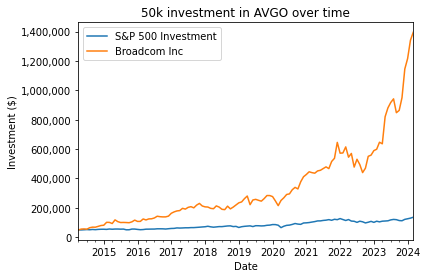

In [364]:



# Your existing plotting code
sp_avgo.plot()
plt.title('50k investment in AVGO over time')
plt.xlabel('Date')
plt.ylabel('Investment ($)')

# Format the y-axis to display numbers with a comma as a thousands separator and no scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the legend
plt.legend(['S&P 500 Investment', 'Broadcom Inc'])

# Show the plot
plt.show()


In [365]:
elf_prices = pd.read_csv('Life On The Edge Fund/ELF.csv')
elf_prices['Date'] = pd.to_datetime(elf_prices['Date'])
elf_prices.set_index('Date', inplace=True)

In [366]:
sp500 = pd.read_csv('sp500_index.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500 = sp500.resample('MS').first()

sp500.rename(columns={'Price': 'Value'}, inplace=True)
sp500 = sp500.loc[sp500.index>'2019-03-01']




In [367]:
elf_value = pd.DataFrame({'Date':elf_prices.index,'Value':elf_prices['Close']})
elf_value.set_index('Date', inplace = True)



In [368]:
quantity_sp = 50000/sp500.iloc[0][0]
quantity_elf = 50000/elf_prices.iloc[0]['Close']



In [369]:
sp500['Value']*=quantity_sp
elf_value['Value']*=quantity_elf

In [370]:
sp500['Value']

Date
2019-04-01   50000.00
2019-05-01   50985.98
2019-06-01   47859.58
2019-07-01   51693.99
2019-08-01   51506.18
2019-09-01   50681.50
2019-10-01   51274.07
2019-11-01   53482.85
2019-12-01   54301.77
2020-01-01   56812.59
2020-02-01   56656.87
2020-03-01   53889.52
2020-04-01   43082.25
2020-05-01   49363.84
2020-06-01   53287.89
2020-07-01   54336.48
2020-08-01   57453.64
2020-09-01   61500.11
2020-10-01   58956.68
2020-11-01   57726.21
2020-12-01   63868.28
2021-01-01   64534.44
2021-02-01   65811.13
2021-03-01   68042.58
2021-04-01   70101.21
2021-05-01   73114.44
2021-06-01   73278.02
2021-07-01   75334.04
2021-08-01   76506.27
2021-09-01   78894.14
2021-10-01   75981.01
2021-11-01   80456.30
2021-12-01   78701.45
2022-01-01   83645.66
2022-02-01   79285.64
2022-03-01   75095.48
2022-04-01   79273.78
2022-05-01   72464.33
2022-06-01   71520.02
2022-07-01   66708.69
2022-08-01   71823.46
2022-09-01   69176.62
2022-10-01   64146.95
2022-11-01   67245.28
2022-12-01   71089.99
2023-

In [371]:
combined = pd.merge(sp500, elf_value, left_index=True, right_index=True, suffixes=['_sp500','_elf'])
combined

,Value_sp500,Value_elf
Date,,
2019-04-01,50000.00,24729.31
2019-05-01,50985.98,19702.24
2019-06-01,47859.58,27262.18
2019-07-01,51693.99,32076.56
2019-08-01,51506.18,31554.52
2019-09-01,50681.50,33855.37
2019-10-01,51274.07,32482.60
2019-11-01,53482.85,32037.90
2019-12-01,54301.77,31187.16


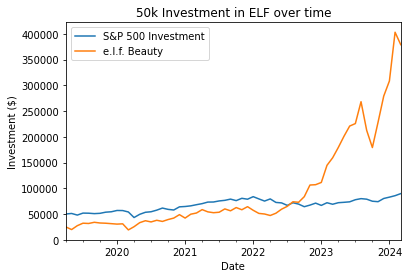

In [372]:
combined.plot()
plt.title('50k Investment in ELF over time')
plt.xlabel('Date')
plt.ylabel('Investment ($)')
plt.legend(['S&P 500 Investment','e.l.f. Beauty'])
plt.show()
